## Decision Tree Assignment -> Colin Kirby

In [1]:
# Imports.
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

## Data Loading & Preprocessing

In [2]:
# List of Column Names.
columns = [
    'age', 'class_of_worker', 'detailed_industry_recode', 'detailed_occupation_recode', 'education',
    'wage_per_hour', 'enroll_in_edu_last_week', 'marital_status', 'major_industry_code',
    'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_a_labor_union',
    'reason_for_unemployment', 'full_or_part_time_employment_stat', 'capital_gains',
    'capital_losses', 'dividends_from_stocks', 'tax_filer_stat', 'region_of_previous_residence',
    'state_of_previous_residence', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household',
    'instance_weight', 'migration_code_change_in_msa', 'migration_code_change_in_region', 'migration_code_move_within_region',
    'live_in_this_house_1_year_ago', 'migration_previous_res_in_sunbelt', 'num_persons_worked_for_employer',
    'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self',
    'citizenship', 'own_business_or_self_employed', 'fill_inc_questionnaire_for_veteran_admin', 'veterans_benefits',
    'weeks_worked_in_year', 'year', 'income'
]

# Load Training Data.
train_data = pd.read_csv('census-income.data', header=None, names=columns)

# Load Testing Data.
test_data = pd.read_csv('census-income.test', header=None, names=columns)


## Handling Missing Values

In [3]:
# Divide Data by Numerical vs Categorical.
numeric_columns = train_data.select_dtypes(include=['number']).columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# For Numeric Values, Fill Missing Data w/ Median Value.
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].median())
test_data[numeric_columns] = test_data[numeric_columns].fillna(test_data[numeric_columns].median())

# For Categorical Values, Fill Missing Data w/ Mode. (As it is the most frequent value).
train_data[categorical_columns] = train_data[categorical_columns].fillna(train_data[categorical_columns].mode().iloc[0])
test_data[categorical_columns] = test_data[categorical_columns].fillna(test_data[categorical_columns].mode().iloc[0])


In [4]:
# Display first Rows of Training Data before Processing.
print("First few rows of the preprocessed training data:")
print(train_data.head())

First few rows of the preprocessed training data:
   age                  class_of_worker  detailed_industry_recode  \
0   73                  Not in universe                         0   
1   58   Self-employed-not incorporated                         4   
2   18                  Not in universe                         0   
3    9                  Not in universe                         0   
4   10                  Not in universe                         0   

   detailed_occupation_recode                    education  wage_per_hour  \
0                           0         High school graduate              0   
1                          34   Some college but no degree              0   
2                           0                   10th grade              0   
3                           0                     Children              0   
4                           0                     Children              0   

  enroll_in_edu_last_week  marital_status           major_industry_code 

In [5]:
# Display first Rows of Testing Data before Processing.
print("First few rows of the preprocessed testing data:")
print(test_data.head())

First few rows of the preprocessed testing data:
   age                  class_of_worker  detailed_industry_recode  \
0   38                          Private                         6   
1   44   Self-employed-not incorporated                        37   
2    2                  Not in universe                         0   
3   35                          Private                        29   
4   49                          Private                         4   

   detailed_occupation_recode                             education  \
0                          36              1st 2nd 3rd or 4th grade   
1                          12   Associates degree-occup /vocational   
2                           0                              Children   
3                           3                  High school graduate   
4                          34                  High school graduate   

   wage_per_hour enroll_in_edu_last_week                    marital_status  \
0              0         Not in

## Label Encoding for Categorical Features

In [6]:
# Initialize LabelEncoder.
label_encoder = LabelEncoder()

# Loop through Col. in Training Data.
for col in train_data.select_dtypes(include='object').columns:

    # Encode Training Data (Categories -> Numerical Data)
    train_data[col] = label_encoder.fit_transform(train_data[col])

    # Encode Testing Data (Categories -> Numerical Data)
    test_data[col] = label_encoder.transform(test_data[col])


## Splitting Data

In [7]:
# Separate Training Data.

# X (Independent Variable) : All Columns Except 'Income'.
X_train = train_data.drop(columns=['income'])

# Y (Dependent Variable) : Target Column 'Income'.
y_train = train_data['income']

# Separate Testing Data.

# X (Independent Variable) : All Columns Except 'Income'.
X_test = test_data.drop(columns=['income'])

# Y (Dependent Variable) : Target Column 'Income'.
y_test = test_data['income']

In [8]:
# Split Training Data into 2 : Training & Validation

# X_train, y_train : Training the Model.
# X_val, y_val : Validate Model's Performance.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

## Evaluating Model on Training Data

In [9]:
# Initialize Decision Tree w/ Max Depth of 3.
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Traing Classifier on Training Data.
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [10]:
# Use Classifer to Predict Lables for Val Set.
y_pred = clf.predict(X_val)

# Output Accuracy (by comparing to actual label).
print("Accuracy:", accuracy_score(y_val, y_pred))

# Print Classification Report. (Precision, Recall, F1)
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.9466394907863742
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     56275
           1       0.77      0.16      0.26      3582

    accuracy                           0.95     59857
   macro avg       0.86      0.58      0.62     59857
weighted avg       0.94      0.95      0.93     59857



## Visualizing Decision Tree

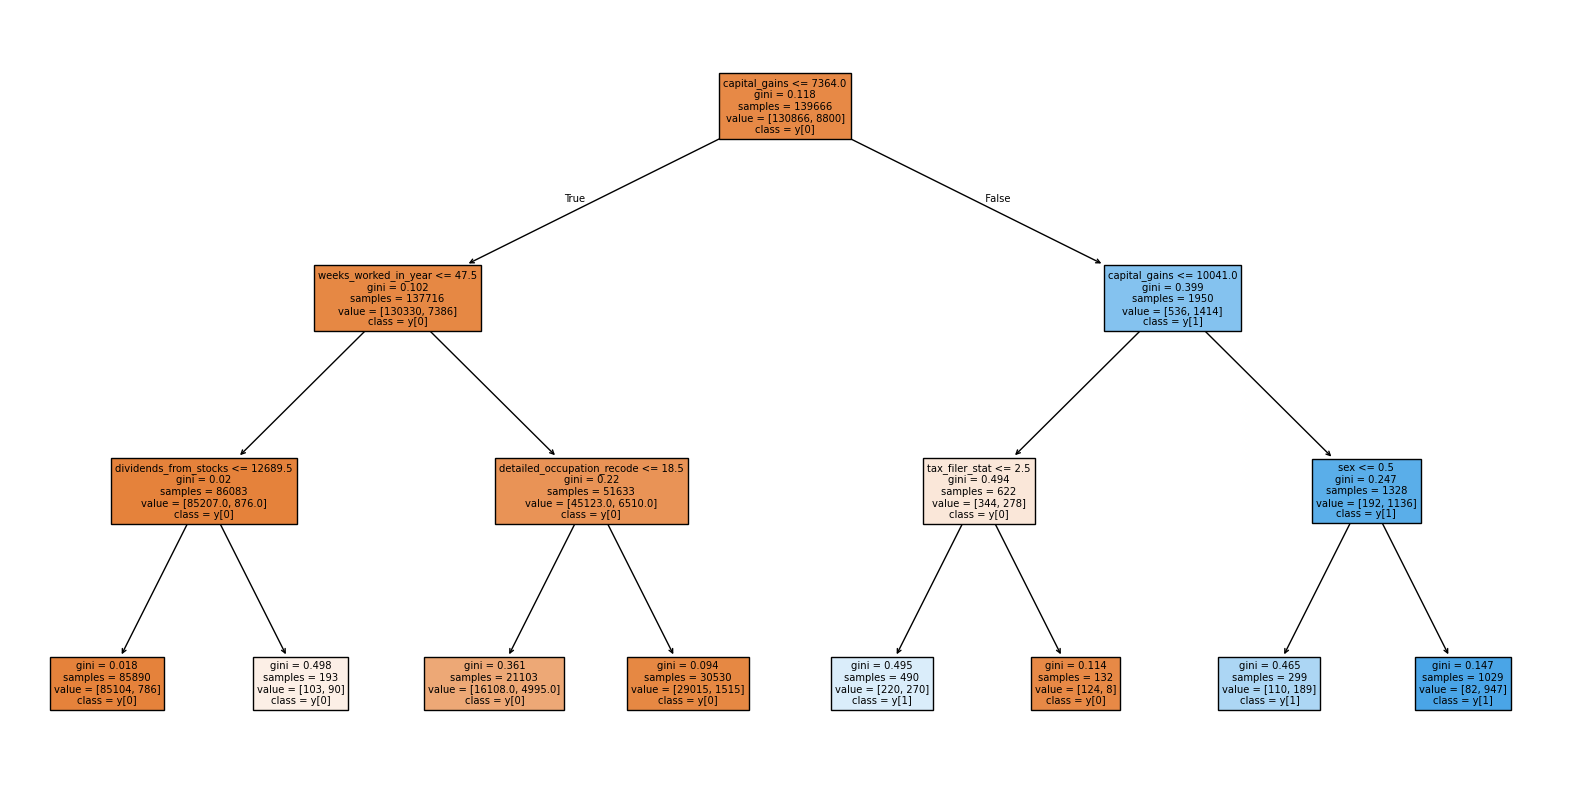

In [11]:
# Create New Figure.
plt.figure(figsize=(20,10))

# Plot the Decision Tree.
tree.plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=True)

# Display Plot.
plt.show()

## Feature Importance

In [12]:
# Get Feature Importance from Trained Decision Tree.
feature_importances = clf.feature_importances_

# Print Feature Names & Their Importance Score.
for name, importance in zip(X_train.columns, feature_importances):
    print(f"{name}: {importance}")

age: 0.0
class_of_worker: 0.0
detailed_industry_recode: 0.0
detailed_occupation_recode: 0.23075127030650425
education: 0.0
wage_per_hour: 0.0
enroll_in_edu_last_week: 0.0
marital_status: 0.0
major_industry_code: 0.0
major_occupation_code: 0.0
race: 0.0
hispanic_origin: 0.0
sex: 0.01016874011632119
member_of_a_labor_union: 0.0
reason_for_unemployment: 0.0
full_or_part_time_employment_stat: 0.0
capital_gains: 0.4954835586963312
capital_losses: 0.0
dividends_from_stocks: 0.021267515126191208
tax_filer_stat: 0.013215534702477359
region_of_previous_residence: 0.0
state_of_previous_residence: 0.0
detailed_household_and_family_stat: 0.0
detailed_household_summary_in_household: 0.0
instance_weight: 0.0
migration_code_change_in_msa: 0.0
migration_code_change_in_region: 0.0
migration_code_move_within_region: 0.0
live_in_this_house_1_year_ago: 0.0
migration_previous_res_in_sunbelt: 0.0
num_persons_worked_for_employer: 0.0
family_members_under_18: 0.0
country_of_birth_father: 0.0
country_of_birth_

## Feature Importance Discussion

From this model, the most important feature looks to be capital gains, as it has the highest importance score of 0.495. This makes sense because capital gains represent the profit earned from selling investments or assets. Individuals with higher capital gains are more likely to belong to the higher income group (> 50K).

Capital gains directly reflect an individual's wealth. People who generate large capital gains typically have access to more frequent and frugal investment opportunities, which often results in higher overall income. This feature alone can significantly help the model distinguish between individuals earning ≤ 50K and those earning > 50K.

If someone is earning money from investments, it's a strong indicator that they have additional sources of wealth beyond regular wages or salaries. This makes capital gains a critical factor for the model when predicting whether someone earns more than 50K.

## Evaluation on Test Data Set

In [13]:
# Use Classifer to Predict Lables for Val Set.
y_test_pred = clf.predict(X_test)

# Output Accuracy (by comparing to actual label).
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Print Classification Report (Precision, Recall, F1).
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# 0 in Output represe

Test Accuracy: 0.9446683105791784
Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     93576
           1       0.76      0.16      0.26      6186

    accuracy                           0.94     99762
   macro avg       0.86      0.58      0.61     99762
weighted avg       0.94      0.94      0.93     99762

[0 1]
[0 1]
